# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [18]:
#建立模型
#宣告採用序列模型
model = Sequential()

#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

#建構隱藏層
model.add(Dense(units=64, kernel_initializer='normal', activation='softmax'))
model.add(Dense(units=32, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=16, kernel_initializer='normal', activation='softmax'))
model.add(Dense(units=10, kernel_initializer='normal', activation='relu'))



#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_15 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_17 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                170       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
Total params: 220,296
Trainable params: 220,296
Non-trainable params: 0
_________________________________________________________________


# 訓練模型

In [20]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [26]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=30, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 6s 123us/step - loss: 0.0687 - acc: 0.9879 - val_loss: 0.2005 - val_acc: 0.9691
Epoch 2/30
48000/48000 [==============================] - 6s 131us/step - loss: 0.0676 - acc: 0.9880 - val_loss: 0.1957 - val_acc: 0.9708
Epoch 3/30
48000/48000 [==============================] - 7s 152us/step - loss: 0.0656 - acc: 0.9886 - val_loss: 0.1917 - val_acc: 0.9710
Epoch 4/30
48000/48000 [==============================] - 10s 200us/step - loss: 0.0615 - acc: 0.9896 - val_loss: 0.1943 - val_acc: 0.9708
Epoch 5/30
48000/48000 [==============================] - 11s 220us/step - loss: 0.0512 - acc: 0.9915 - val_loss: 0.1655 - val_acc: 0.9764
Epoch 6/30
48000/48000 [==============================] - 7s 156us/step - loss: 0.0493 - acc: 0.9919 - val_loss: 0.1706 - val_acc: 0.9755
Epoch 7/30
48000/48000 [==============================] - 7s 156us/step - loss: 0.0535 - acc: 0.9918 - val_loss: 0.2065 

# 以圖形顯示訓練過程

In [27]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

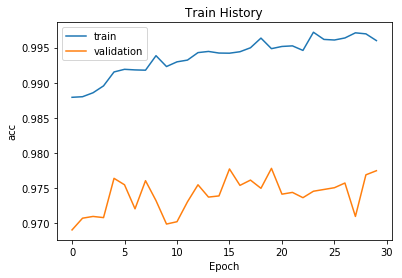

In [28]:
show_train_history(train_history,'acc','val_acc')

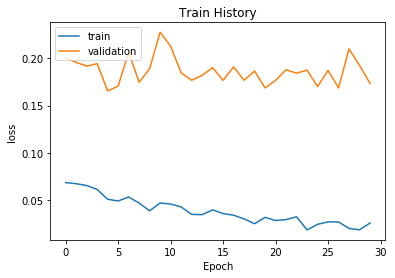

In [29]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [30]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 33us/step

accuracy= 0.9791
